In [1]:
import torch
import cv2
import numpy as np
from torch import nn
import torch.nn.functional as F
import string
import matplotlib.pyplot as plt
import os


In [8]:
#load alphabet into a list and create a dictionary to map each letter to a number
alphabet = list(string.ascii_uppercase)[:25]
num2letter = {num: letter for num, letter in enumerate(alphabet)}

class MLP_dropout(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP_dropout, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p=0.1)
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x
# initialize the model and load model_Adam_dropout.pt from current directory
model = MLP_dropout(784, 256, 25)
model.load_state_dict(torch.load('./Assignment 2/model_Adam_dropout.pt'))



<All keys matched successfully>

The following cell will open the webcam and predict the letter on the screen. You can use the 'q' key to quit the program.

In [ ]:
model.eval()
def predict():
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        if not ret:
            print("failed to grab frame")
            break
        x = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        x = cv2.resize(x, (28, 28))
        x = np.array(x).reshape(1, -1)
        x = torch.from_numpy(x).float()
        pred = model(x)
        pred = pred.argmax(dim=1, keepdim=True)
        print(pred)
        cv2.putText(frame, str(num2letter[pred.item()]), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()   

predict()

The following cell will use 3 images taken from camera to predict the letter.

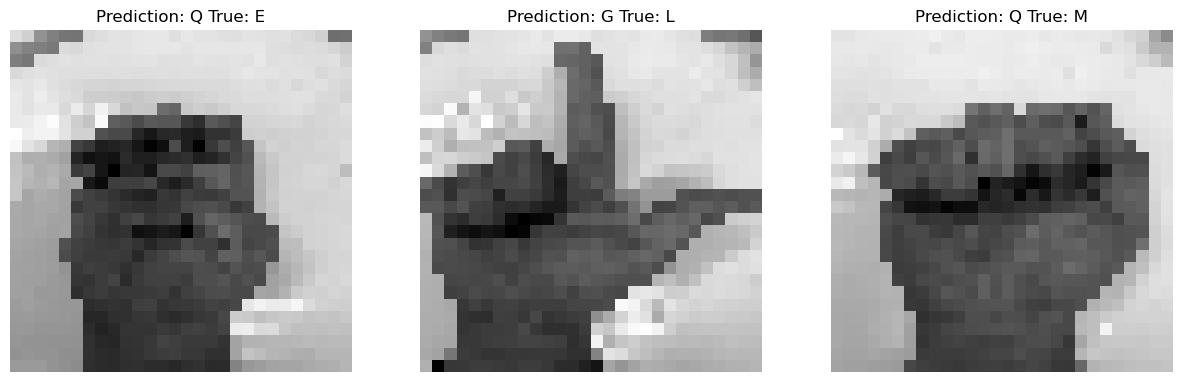

In [17]:
letter2num = {letter: num for num, letter in enumerate(alphabet)}
y_true = [letter2num['E'], letter2num['L'], letter2num['M']]
model.eval()

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
for i, file in enumerate(os.listdir('./Assignment 2/Figures/Q3_test')):
    img = cv2.imread('./Assignment 2/Figures/Q3_test/' + file, 0)
    img = cv2.resize(img, (28, 28))
    img = np.array(img).reshape(1, -1)
    img = torch.from_numpy(img).float()
    pred = model(img)
    pred = pred.argmax(dim=1, keepdim=True)
    ax[i].imshow(img.reshape(28, 28), cmap='gray')
    ax[i].set_title('Prediction: ' + str(num2letter[pred.item()]) + ' True: ' + str(num2letter[y_true[i]]))
    ax[i].axis('off')

plt.show()